# PCA Lab @ Telecom SudParis

# Lab: Face recognition using PCA

This nootebook contains a PYTHON implementation of Face Recognition from images , based on Principal Components Analysis (PCA).
This Lab demonstartes the use of Principal Component Analysis, a method of dimensional reduction in order to help us create a model for Facial Recognition. The idea is to project faces onto a feature space which best encodes them, these features spaces mathematically correspond to the eigen vector space of these vectors. We then use the following projections along with Machine Learning techniques to build a Facial Recognizer

We will be using Python to help us develop this model

@inproceedings{Turk1998,
    Author = {M. A. Turk and A. P. Pentland},
    title     = {Face recognition using eigenfaces},
    booktitle = {Proceedings. 1991 IEEE Computer Society Conference on Computer Vision and Pattern Recognition},
    year      = {1998},
}

# Demo:

To run the demo, you should complete all following TODO.
The Face Recognition system includes the following  main steps:

1. Compute the mean face
2. Data normalization
3. PCA construction
4. Compute the retained eigenvectors
5. Projection on the PCA space
6. Test of a query image

# Datatset

## Import the needed packages

In [1]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


import numpy as np
from numpy import cov
from numpy.linalg import eig

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

Automatically created module for IPython interactive environment


# Load the dataset

In [2]:

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
############################################
#######TODO 1: Print dataset statistics#####
############################################

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

2021-09-27 12:03:40,578 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012
2021-09-27 12:03:41,770 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2021-09-27 12:03:42,695 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2021-09-27 12:03:43,936 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


# Split the dataset

In [3]:
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# Compute mean face

(966, 1850)
(1850,)


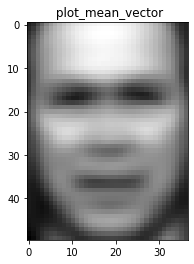

In [4]:
############################################
#######TODO 2: Compute mean face ###########
############################################

print(X_train.shape)
mean_face = X_train.mean(axis=0)
print(mean_face.shape)
mean_face_img = np.reshape(mean_face, [h,w])
fig,axarr = plt.subplots()
axarr.set_title(" plot_mean_vector")
axarr.imshow(mean_face_img, cmap=plt.cm.gray)

# Normalisation

In [5]:
# the normalized image matrix. it will be normalized by subtracting from the average image later
#####################################################################
#######TODO 3: center columns by subtracting column means ###########
#####################################################################

X_train_norm = X_train - mean_face
print(X_train_norm.shape)
print(X_train.shape)
print(mean_face.shape)

(966, 1850)
(966, 1850)
(1850,)


# calculate covariance matrix of centered matrix

In [6]:
##########################################################################################
#######TODO 4: calculate covariance matrix of centered matrix, its dimension ? ###########
##########################################################################################

V = cov(X_train_norm.T)
#or using follwing command
#V = np.dot(np.transpose(X_train_norm), X_train_norm) # A^TA
print(V.shape)

(1850, 1850)


# Eigen decomposition of covariance matrix

In [7]:
##########################################################################################
#######TODO 5: Find the EigenVectors and the EigenValues of ##############################
#######        covariance matrix V, using the function (eig) #############################
##########################################################################################
eigenValues, eigenVectors = eig(V)
#print(vectors)
#print(values)

# Sort eigenvalues/engenvectors

In [8]:
idx = eigenValues.real.argsort()[::-1]   
eigenValues = eigenValues.real[idx]
eigenVectors = eigenVectors.real[:,idx]

In [9]:
print(eigenValues)

[ 5.01418507e+05  3.91794661e+05  1.83593046e+05 ... -7.25676854e-12
 -7.25676854e-12 -7.31488483e-12]


In [10]:
#########################################################################################
#######TODO 6: Find the number of EigenVectors corresponds to the retained variance #####
#########################################################################################

# plot eigenvectors

(966, 1850)


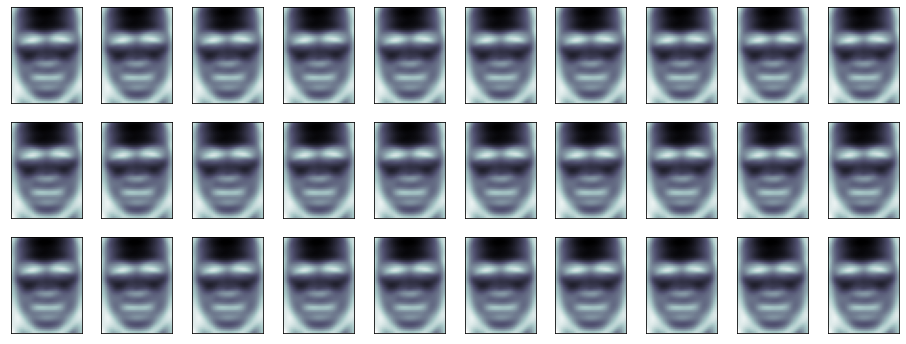

In [11]:
#Compute components
U = np.dot(X_train_norm,eigenVectors)+mean_face
# reduce to requested number of eigenvectors
#U = np.transpose(U)
print(U.shape)

#nb_components = min(len(eigenvectors), nb_components)
#U = U[0:nb_components, :]
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(eigenVectors[i].reshape([h,w])-mean_face.reshape([h,w]),
              cmap=plt.cm.bone)


# Compute PCA directly using PYTHON library 

We can now compute a PCA (eigenfaces) on the face dataset (treated as unlabeled dataset): unsupervised feature extraction / dimensionality reduction.

In [12]:
n_components = 50

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]) )
t0 = time()

#########################################################################################
#######TODO 7: Create an instance of PCA, initializing with            ##################
#######        n_components=n_components and whiten=True               ##################
#########################################################################################

pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')

#########################################################################################
#######TODO 8: pass the training dataset (X_train) to pca's 'fit()' method   ############
#########################################################################################

pca = pca.fit(X_train)


print("done in %0.3fs" % (time() - t0))

Extracting the top 50 eigenfaces from 966 faces
done in 0.260s


## Visualize Mean face

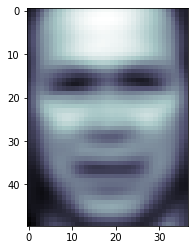

In [13]:
#One interesting part of PCA is that it computes the “mean” face, which can be interesting to examine:

plt.imshow(pca.mean_.reshape([h,w]),cmap=plt.cm.bone)

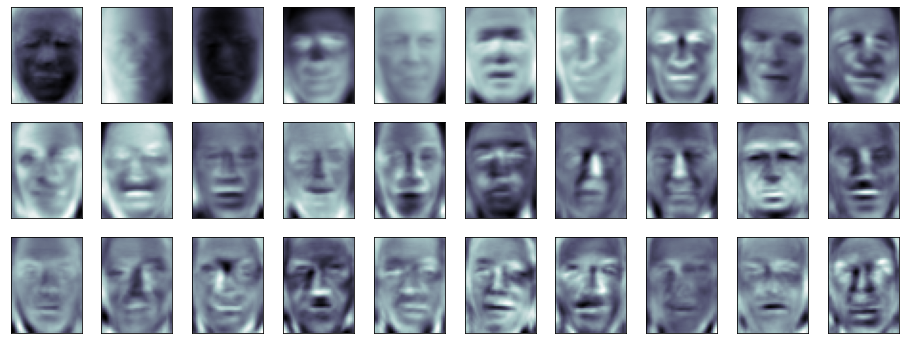

In [14]:
#It is also interesting to visualize these principal components:

fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape([h,w]),
              cmap=plt.cm.bone)

### Projection

In [15]:
#The components (“eigenfaces”) are ordered by their importance from top-left to bottom-right. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

#########################################################################################
#######TODO 9: With this projection computed, we can now project        #################
#######        our original training and test data onto the PCA basis:  #################
#########################################################################################

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(966, 50)
(322, 50)


 ### Classification

In [16]:
print("Fitting the classifier to the training set")
clf = KNeighborsClassifier(n_neighbors=1)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
#print("Best estimator found by grid search:")

Fitting the classifier to the training set
done in 1.855s


### Quantitative evaluation of the model quality on the test set

1. Classification Report
Now that we have the classifier trained, let's run it on the test dataset and qualitatively evaluate its results. Sklearn's classification_report shows some of the main classification metrics for each class.

In [17]:
print("Predicting people's names on the test set")
y_pred = clf.predict(X_test_pca)
 
print(classification_report(y_test, y_pred, target_names=target_names))

Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.55      0.46      0.50        13
     Colin Powell       0.70      0.63      0.67        60
  Donald Rumsfeld       0.38      0.44      0.41        27
    George W Bush       0.71      0.75      0.73       146
Gerhard Schroeder       0.82      0.36      0.50        25
      Hugo Chavez       0.60      0.60      0.60        15
       Tony Blair       0.53      0.67      0.59        36

         accuracy                           0.65       322
        macro avg       0.61      0.56      0.57       322
     weighted avg       0.66      0.65      0.64       322



2. Confusion Matrix
Another way to look at the performance of the classifier is by looking the confusion matrix. We can do that by simply invoking sklearn.metrics.confusion_matrix:

In [19]:
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

[[  6   2   1   4   0   0   0]
 [  2  38   5  13   0   0   2]
 [  0   2  12  12   0   0   1]
 [  1   8  10 110   2   4  11]
 [  2   1   0   5   9   2   6]
 [  0   2   0   3   0   9   1]
 [  0   1   4   7   0   0  24]]
